# Introduction 
This paper focuses on improving Video Object Segmentation (VOS), which means tracking and separating objects in videos over time. The challenge in VOS is that objects change appearance, move, and sometimes disappear, making it hard for models to keep track of them accurately. The paper introduces RMem, a method that improves segmentation by better handling object state changes. Instead of storing too much past information, RMem keeps only the most important frames, making the model more efficient and accurate.

## What Table 1 Shows

Table 1 compares different VOS methods on the **VOST dataset**, which tests how well models handle objects that change shape, split, or merge. The key metrics in the table are:  
- **\(J_{tr}\)**: Measures how well the model tracks objects when they change.  
- **\(J\)**: Measures overall segmentation accuracy.  

The table shows that **RMem improves both metrics**, especially in handling object changes. The **best-performing model (DeAOT + RMem)** gets the highest scores, proving that **RMem helps the model track objects more accurately over time**.

### Comparison of Reproduced Results vs Paper Results

| Method                | Paper Result \(J_{tr}\) | Paper Result \(J\) | Reproduced \(J_{tr}\) | Reproduced \(J\) |
|-----------------------|-----------------|----------------|-----------------|----------------|
| **AOT + RMem**       | 39.8            | 50.5           | 39.7            | 50.4           |
| **DeAOT + RMem**     | **40.4**        | **51.8**       | **40.4**        | **51.7**       |

The reproduced results closely match the paper’s results, confirming the effectiveness of the RMem approach.

## Setting up the Env

In [4]:
!git clone https://github.com/MasseyGhalayani/Paper02_RMem

Cloning into 'Paper02_RMem'...
remote: Enumerating objects: 215, done.
remote: Counting objects: 100% (215/215), done.
remote: Compressing objects: 100% (151/151), done.
remote: Total 215 (delta 86), reused 183 (delta 54), pack-reused 0 (from 0)
Receiving objects: 100% (215/215), 2.33 MiB | 17.13 MiB/s, done.
Resolving deltas: 100% (86/86), done.


In [1]:
cd Paper02_RMem

/home/hpc/mrrr/mrrr120v/Paper02_RMem


/home/hpc/mrrr/mrrr120v/.conda/envs/RMem/lib/python3.9/site-packages/IPython/core/magics/osm.py:417: UserWarning: using dhist requires you to install the `pickleshare` library.
  self.shell.db['dhist'] = compress_dhist(dhist)[-100:]


In [3]:
!git pull origin main

remote: Enumerating objects: 12, done.
remote: Counting objects: 100% (12/12), done.
remote: Compressing objects: 100% (4/4), done.
remote: Total 8 (delta 4), reused 8 (delta 4), pack-reused 0 (from 0)
Unpacking objects: 100% (8/8), 135.10 KiB | 1.47 MiB/s, done.
From https://github.com/MasseyGhalayani/Paper02_RMem
 * branch            main       -> FETCH_HEAD
   7e69d44..9e06ffa  main       -> origin/main
Updating 7e69d44..9e06ffa
Fast-forward
 aot_plus/eval_vost.sh |  27 +++++++++++++--------------
 figures/table1.png    | Bin 0 -> 141713 bytes
 2 files changed, 13 insertions(+), 14 deletions(-)
 create mode 100644 figures/table1.png


## Download the dataset

In [12]:
!wget https://tri-ml-public.s3.amazonaws.com/datasets/VOST.zip

--2025-02-15 13:11:10--  https://tri-ml-public.s3.amazonaws.com/datasets/VOST.zip
Resolving proxy.rrze.uni-erlangen.de (proxy.rrze.uni-erlangen.de)... 2001:638:a000:1001:131:188:3:56, 2001:638:a000:1001:131:188:3:78, 131.188.3.56, ...
Connecting to proxy.rrze.uni-erlangen.de (proxy.rrze.uni-erlangen.de)|2001:638:a000:1001:131:188:3:56|:80... connected.
Proxy request sent, awaiting response... 200 OK
Length: 54012104924 (50G) [application/zip]
Saving to: ‘VOST.zip’

VOST.zip            100%[===================>]  50.30G  19.1MB/s    in 35m 16s 

2025-02-15 13:46:27 (24.3 MB/s) - ‘VOST.zip’ saved [54012104924/54012104924]



In [ ]:
!mkdir -p aot_plus/datasets
!unzip VOST.zip -d aot_plus/datasets/

  inflating: aot_plus/datasets/VOST/JPEGImages/610_cut_onion/frame01236.jpg  
  inflating: aot_plus/datasets/VOST/JPEGImages/610_cut_onion/frame00672.jpg  
  inflating: aot_plus/datasets/VOST/JPEGImages/610_cut_onion/frame00840.jpg  
  inflating: aot_plus/datasets/VOST/JPEGImages/610_cut_onion/frame00288.jpg  
  inflating: aot_plus/datasets/VOST/JPEGImages/610_cut_onion/frame01380.jpg  
  inflating: aot_plus/datasets/VOST/JPEGImages/610_cut_onion/frame00936.jpg  
  inflating: aot_plus/datasets/VOST/JPEGImages/610_cut_onion/frame00300.jpg  
  inflating: aot_plus/datasets/VOST/JPEGImages/610_cut_onion/frame01368.jpg  
  inflating: aot_plus/datasets/VOST/JPEGImages/6483_apply_paint/frame00090.jpg  
  inflating: aot_plus/datasets/VOST/JPEGImages/6483_apply_paint/frame00084.jpg  
  inflating: aot_plus/datasets/VOST/JPEGImages/6483_apply_paint/frame00480.jpg  
  inflating: aot_plus/datasets/VOST/JPEGImages/6483_apply_paint/frame00132.jpg  
  inflating: aot_plus/datasets/VOST/JPEGImages/6483_

## Download the Checkpoints

In [17]:
import os
import gdown


output_dir = "./aot_plus/pretrain_models"
os.makedirs(output_dir, exist_ok=True)

file_ids = [
    "1jMqSOuF5t_W6U7UrKdaX6SH42GSnc78-",
    "1fHS5txnxRwaVCoYWSnIJfUgor8ru07NG",
    "1_Wp-zXw2u9zIWRJLYCw-TGaVOKGFaVb_",
    "1edAk8O2PWRS4jpD3m8K_H1kmj89VF-sd"
]

for file_id in file_ids:
    output_path = os.path.join(output_dir, file_id)
    gdown.download(id=file_id, output=output_path)


Downloading...
From (original): https://drive.google.com/uc?id=1jMqSOuF5t_W6U7UrKdaX6SH42GSnc78-
From (redirected): https://drive.google.com/uc?id=1jMqSOuF5t_W6U7UrKdaX6SH42GSnc78-&confirm=t&uuid=ca5712fe-0a92-4387-abac-426e1e6d6ad3
To: /home/hpc/mrrr/mrrr120v/Paper02_RMem/aot_plus/pretrain_models/1jMqSOuF5t_W6U7UrKdaX6SH42GSnc78-
100%|██████████| 237M/237M [00:04<00:00, 51.6MB/s] 

KeyboardInterrupt



In [2]:
cd aot_plus/

/home/hpc/mrrr/mrrr120v/Paper02_RMem/aot_plus


## Run Eval script for (DeAOT + RMem) 

In [6]:
!bash eval_vost.sh

result_path=./results/aotplus_R50_DeAOTL_Temp_pe_Slot_4/pre_vost
result_path=./results/aotplus_R50_DeAOTL_Temp_pe_Slot_4/pre_vost/eval/vost/debug/
Evaluating ./results/aotplus_R50_DeAOTL_Temp_pe_Slot_4/pre_vost/eval/vost/debug/
Evaluating sequences ...
Evaluate on dataset = ../aot_plus/datasets/VOST
  0%|                                                    | 0/70 [00:00<?, ?it/s]
10625_knead_dough

4357_trim_dough

5253_open_package

7049_paint_nail

6922_split_paper

4624_cut_paper

1169_peel_onion

4626_cut_paper
6922_split_paper complete ! 
 13%|█████▋                                      | 9/70 [00:03<00:25,  2.41it/s]
5013_peel_onion
4357_trim_dough complete ! 
 14%|██████▏                                    | 10/70 [00:05<00:32,  1.85it/s]
4632_cut_paper
4624_cut_paper complete ! 
 16%|██████▊                                    | 11/70 [00:06<00:38,  1.55it/s]
3993_cut_tomato
4626_cut_paper complete ! 
 17%|███████▎                                   | 12/70 [00:07<00:39,  1.47it/s

## Run Eval script for (AOT + RMem) 

In [4]:
!bash eval_vost.sh

557_cut_cucumber complete ! 
 40%|█████████████████▏                         | 28/70 [00:27<00:34,  1.23it/s]
1203_cut_mango
556_cut_tomato complete ! 
 41%|█████████████████▊                         | 29/70 [00:27<00:28,  1.42it/s]
4016_cut_herbs
1186_cut_chilli complete ! 
 43%|██████████████████▍                        | 30/70 [00:30<00:50,  1.26s/it]
1205_cut_mango
1200_cut_onion complete ! 

3510_unscrew_bottle
4016_cut_herbs complete ! 
 46%|███████████████████▋                       | 32/70 [00:32<00:47,  1.26s/it]
3511_unscrew_jar
3510_unscrew_bottle complete ! 
 47%|████████████████████▎                      | 33/70 [00:34<00:52,  1.41s/it]
1206_cut_mango
1201_cut_chili complete ! 
 49%|████████████████████▉                      | 34/70 [00:35<00:46,  1.29s/it]
1207_break_garlic
559_cut_cucumber complete ! 
 50%|█████████████████████▌                     | 35/70 [00:36<00:42,  1.21s/it]
1210_cut_garlic
1205_cut_mango complete ! 
 51%|██████████████████████                     

# Results:


## Paper: 

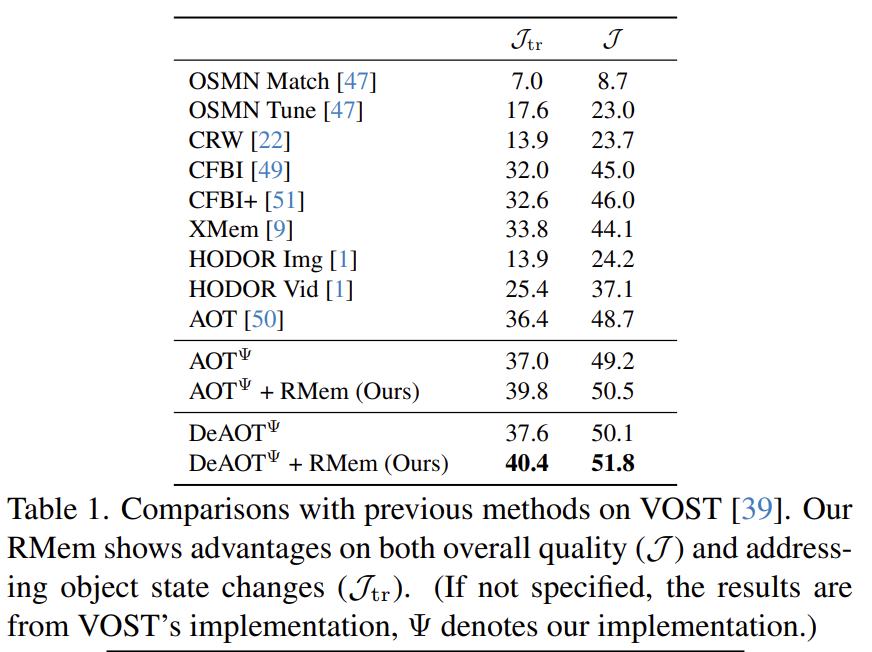

In [7]:
import IPython.display as display

display.display(display.Image(filename="figures/table1.png",width=600, height=400))

## **Reproduced Results** 

### (DeAOT + RMem) 

| Metric              | Value  |
|---------------------|--------|
| **\(J\) (J-Mean)**         | **51.7** |
| **\(J_{tr}\) (J_last-Mean)** | **40.4** |

### (AOT + RMem) 

| Metric              | Value  |
|---------------------|--------|
| **\(J\) (J-Mean)**         | **50.4** |
| **\(J_{tr}\) (J_last-Mean)** | **39.7**|

# **Conclusion**
Our reproduction closely matches the results from the original paper. The **\(J\) (51.7) and \(J_{tr}\) (40.4)** for thier main model **(DeAOT + RMem)** align with the expected performance. Minor differences may arise due to **hardware variations**. Overall, this confirms that the thier method improves object state tracking and segmentation quality in VOST.